In [1]:
#checking directory
import os
os.getcwd()

'C:\\Users\\Jaspreet'

In [2]:
#Loading our dataset using pandas
os.chdir('D:/')
import pandas as pd
df=pd.read_csv('bank-additional-full.csv', delimiter=';')

LOOKING OR EXAMINING DATA

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#for seeing all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


CHECKING FOR NULL VALUES

In [6]:
#checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

VISULIZING OUR DATA

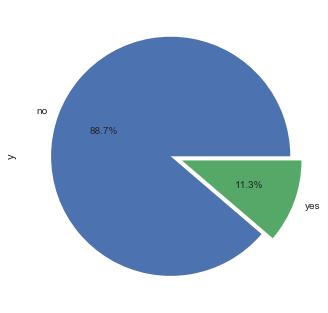

In [66]:
#AS our Target variable y consist of two classes Yes or No,we are just seeing the percentage of each class
import seaborn as sns
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%")

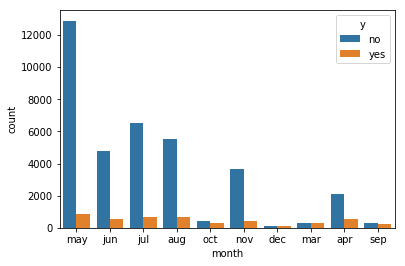

In [8]:
sns.countplot(x="month",hue='y', data=df)

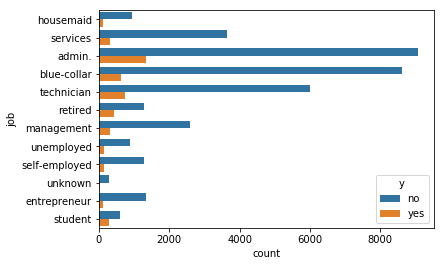

In [9]:
sns.countplot(y="job",hue='y', data=df)

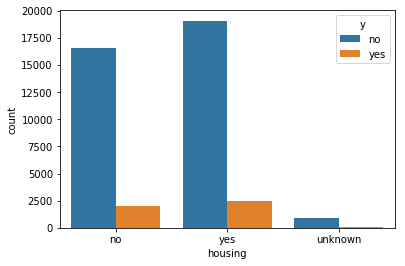

In [10]:
sns.countplot(x="housing",hue='y', data=df)

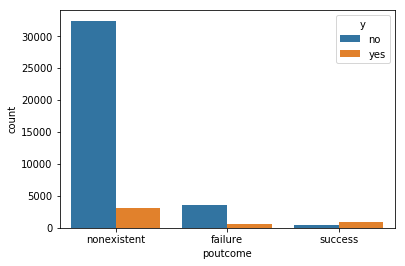

In [11]:
sns.countplot(x="poutcome",hue='y', data=df)

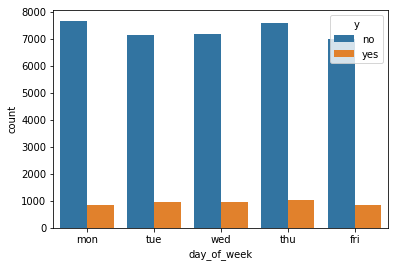

In [12]:
sns.countplot(x="day_of_week",hue='y', data=df)

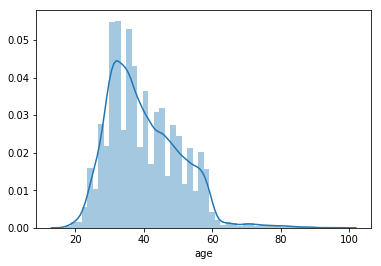

In [13]:
#Using Distribution plot for age column for some info
sns.distplot(df['age'])

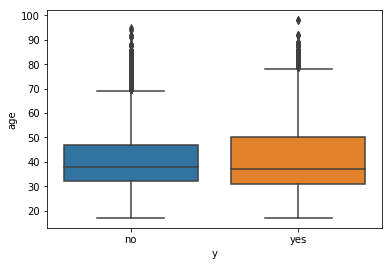

In [14]:
sns.boxplot(x=df['y'],y=df['age'])

AS we saw from above plots people from age 30 to 52 are subscribing or some are not subscribing a term account

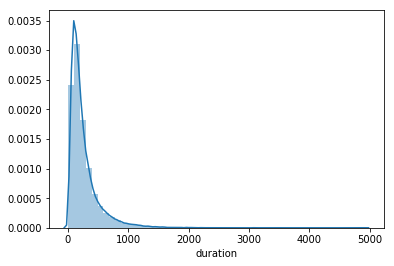

In [15]:
sns.distplot(df['duration'])

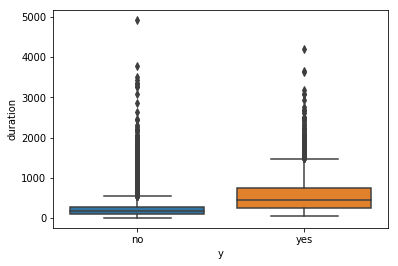

In [16]:
sns.boxplot(x=df['y'],y=df['duration'])

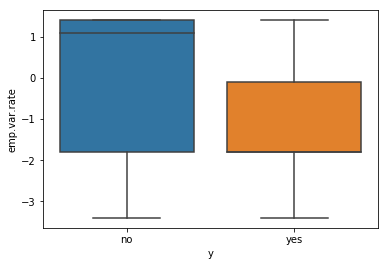

In [17]:
sns.boxplot(x=df['y'],y=df['emp.var.rate'])

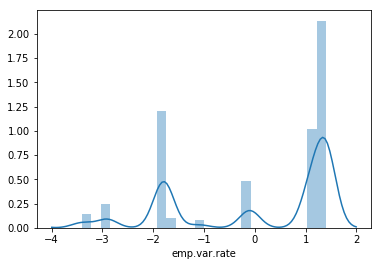

In [18]:
sns.distplot(df['emp.var.rate'])

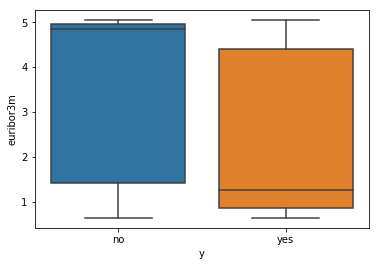

In [19]:
sns.boxplot(x=df['y'],y=df['euribor3m'])

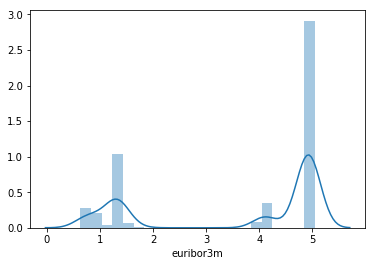

In [20]:
sns.distplot(df['euribor3m'])

Duration is seeing a main feature here to which our target feature is more effected
as from the box plot you can see the median of the both boxplot are on different range so this feature helps us for our model performance

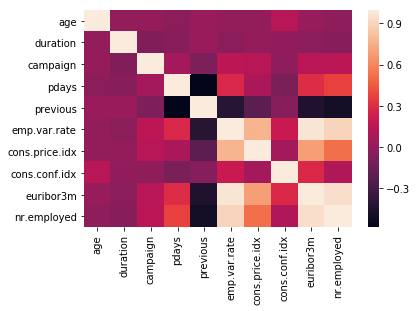

In [21]:
#Checking the correlation of each feature data
sns.heatmap(df.cor)r()

=====================Hypothesis for poutcome and duration feature============================

In [22]:
df_2=df

In [23]:
df_2["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [24]:
import re
df_2['Type'] = df_2['poutcome'].apply(lambda x: 'success' 
                   if re.search('success', x) else 'OTHERS')

In [25]:
df_2['Type'].value_counts()

OTHERS     39815
success     1373
Name: Type, dtype: int64

In [26]:
success = df_2[df_2['Type'] == 'success']['duration']
others = df_2[df_2['Type'] == 'OTHERS']['duration']

In [27]:
print("success mean",success.mean())
print("others mean",others.mean())

success mean 320.9417334304443
others mean 256.1243250031395


In [28]:
# T-test to check whether the duration of sucess mean is lower to other or not 

# Two-Sample T-Test 
# h0 previous success mean is less than other
# h1 previous success high than other
from scipy import stats

r , pval2=stats.ttest_ind(a= success,
                b= others,
                equal_var=False)

In [29]:
if(pval2<0.05):
    print("Reject h0 ",pval2)
else:
    print("failed to reject accept h0",pval2)

Reject h0  9.179851323884813e-20


In [30]:
df=df.drop("Type",axis=1)

In [31]:
#before dropping duplicates
df.shape

(41188, 21)

In [32]:
#After dropping duplicates
df=df.drop_duplicates()
df.shape

(41176, 21)

In [33]:
#Creating dummy variables for our categirical features in data sets so that we can model our data
df1=df

In [34]:
df1=pd.get_dummies(df1,columns=['job','marital','education','default',
            'housing','loan','poutcome','month','y'],drop_first=True)

In [35]:
df1.head()

,age,contact,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,56,telephone,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,57,telephone,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,37,telephone,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,40,telephone,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,56,telephone,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [36]:
df1.drop(['contact','day_of_week'],axis=1,inplace=True)

Preprocessing and Scaling

In [37]:
df1.head()
X=df1.drop(['y_yes'],axis=1,inplace=False)
Y=df1['y_yes']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = 
train_test_split(X,Y,test_size=0.3,random_state=4)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
scaler.fit(X_train)
# same result, but more efficient computation
X_train_scaled = scaler.transform(X_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [40]:
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [41]:
a=X_train.columns

In [42]:
X_train_n=pd.DataFrame(X_train_scaled,columns=a)

In [43]:
b=X_test.columns
X_test_n=pd.DataFrame(X_test_scaled,columns=b)

In [44]:
X_train_n.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.446718,-0.740610,-0.567386,0.195205,-0.352459,-1.197396,-0.862580,-1.420943,-1.253650,-0.940119,-0.536662,-0.194054,-0.163562,-0.277945,-0.206700,-0.186716,-0.324701,-0.149364,-0.443979,-0.158114,-0.087097,-1.236976,1.598263,-0.04529,-0.240825,-0.413982,-0.551711,-0.022044,2.615912,-0.648392,-0.208609,-0.516506,-0.00589,-0.155793,0.952188,-0.155793,-0.42103,0.400433,-0.185419,-0.419201,-0.067311,-0.455465,-0.385429,-0.117269,-0.711767,-0.334277,-0.135546,-0.117269
1,2.315524,0.015649,-0.204042,0.195205,-0.352459,-1.197396,-0.354889,1.234470,-1.721398,-2.192389,-0.536662,-0.194054,-0.163562,-0.277945,4.837932,-0.186716,-0.324701,-0.149364,-0.443979,-0.158114,-0.087097,0.808423,-0.625679,-0.04529,-0.240825,-0.413982,-0.551711,-0.022044,-0.382276,-0.648392,-0.208609,-0.516506,-0.00589,-0.155793,0.952188,-0.155793,-0.42103,0.400433,-0.185419,-0.419201,-0.067311,-0.455465,-0.385429,8.527374,-0.711767,-0.334277,-0.135546,-0.117269
2,0.096766,-0.655288,0.522647,0.195205,-0.352459,0.841520,-0.225377,0.953817,0.775949,0.846861,-0.536662,-0.194054,-0.163562,-0.277945,-0.206700,-0.186716,-0.324701,-0.149364,2.252357,-0.158114,-0.087097,0.808423,-0.625679,-0.04529,-0.240825,-0.413982,-0.551711,-0.022044,2.615912,-0.648392,-0.208609,-0.516506,-0.00589,-0.155793,0.952188,-0.155793,-0.42103,0.400433,-0.185419,2.385493,-0.067311,-0.455465,-0.385429,-0.117269,-0.711767,-0.334277,-0.135546,-0.117269
3,0.386169,-0.756123,-0.567386,0.195205,-0.352459,0.841520,-0.225377,0.953817,0.775373,0.846861,1.863370,-0.194054,-0.163562,-0.277945,-0.206700,-0.186716,-0.324701,-0.149364,-0.443979,-0.158114,-0.087097,0.808423,-0.625679,-0.04529,-0.240825,-0.413982,-0.551711,-0.022044,-0.382276,-0.648392,-0.208609,1.936088,-0.00589,-0.155793,0.952188,-0.155793,-0.42103,0.400433,-0.185419,2.385493,-0.067311,-0.455465,-0.385429,-0.117269,-0.711767,-0.334277,-0.135546,-0.117269
4,-0.674976,-0.546697,-0.204042,0.195205,-0.352459,0.841520,-0.225377,0.953817,0.775949,0.846861,-0.536662,-0.194054,-0.163562,-0.277945,-0.206700,-0.186716,-0.324701,-0.149364,-0.443979,-0.158114,-0.087097,0.808423,-0.625679,-0.04529,-0.240825,-0.413982,-0.551711,-0.022044,-0.382276,1.542277,-0.208609,-0.516506,-0.00589,-0.155793,0.952188,-0.155793,-0.42103,0.400433,-0.185419,2.385493,-0.067311,-0.455465,-0.385429,-0.117269,-0.711767,-0.334277,-0.135546,-0.117269


Modeling oF Scaled DATA

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
logreg = LogisticRegression(C=100).fit(X_train_n, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Try Another Model FOR Classification

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

Parameter Tuning In Logestic Regression As we choose Logistic Regression as our Model here because Random Forest 
overfitting our model

MODEL EVALUTION USING AUC-ROC CURVE

In [48]:
from sklearn.metrics import roc_curve

y_pred_test_proba=logreg.predict_proba(X_test_n)

fp,tp,th=roc_curve(y_test,y_pred_test_proba[:,1])

y_pred_test_forest_proba=forest.predict_proba(X_test)

fp1,tp1,th1=roc_curve(y_test,y_pred_test_forest_proba[:,1])

In [49]:
from sklearn.metrics import roc_auc_score
auc_score1=roc_auc_score(y_test,y_pred_test_proba[:,1])
print("saperation of two classes",auc_score1)

saperation of two classes 0.9360374811320816


In [50]:
auc_score=roc_auc_score(y_test,y_pred_test_forest_proba[:,1])
print("saperation of two classes for Forest",auc_score)

saperation of two classes for Forest 0.9390152258997786


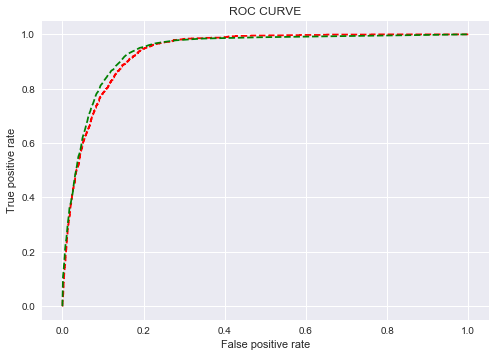

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(fp,tp,linestyle='--',color='red',label="a")
plt.plot(fp1,tp1,linestyle='--',color='green',label='Forest')
plt.title("ROC CURVE")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [52]:
import numpy as np
from numpy import argmax
from numpy import sqrt
gmeans=sqrt(tp1*(1-fp1))
ix=argmax(gmeans)
print("beat threshold forest",th1[ix])

beat threshold forest 0.12


In [53]:
probas=y_pred_test_forest_proba[:,1]
val=th1[ix]
clas=[]
for i in probas:
    if i>val:
        clas.append(1)
    else:
        clas.append(0)

In [54]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,clas)
mat

array([[9274, 1669],
       [ 116, 1294]], dtype=int64)

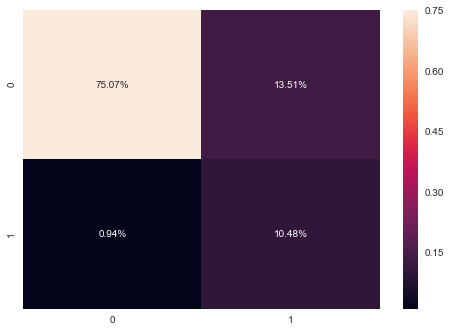

In [55]:
sns.heatmap(mat/np.sum(mat),annot=True,fmt='.2%')

======================================DROPPING DURATION================================================================

In [56]:
X_train_n1=X_train_n.drop("duration",axis=1,inplace=False)
X_test_n1=X_test_n.drop("duration",axis=1,inplace=False)

X_train1=X_train.drop("duration",axis=1,inplace=False)
X_test1=X_test.drop("duration",axis=1,inplace=False)

logreg123 = LogisticRegression(C=100).fit(X_train_n1, y_train)

forest111 = RandomForestClassifier(n_estimators=100, random_state=2)
forest111.fit(X_train1, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [57]:
y_pred_test_proba1=logreg123.predict_proba(X_test_n1)

fp12,tp12,th12=roc_curve(y_test,y_pred_test_proba1[:,1])


In [58]:
y_pred_test_forest_proba1=forest111.predict_proba(X_test1)

fp11,tp11,th11=roc_curve(y_test,y_pred_test_forest_proba1[:,1])

In [59]:
from sklearn.metrics import roc_auc_score
auc_score12=roc_auc_score(y_test,y_pred_test_proba1[:,1])
print("saperation of two classes",auc_score12)

saperation of two classes 0.7984798080057655


In [60]:
auc_score121=roc_auc_score(y_test,y_pred_test_forest_proba1[:,1])
print("saperation of two classes for Forest",auc_score121)

saperation of two classes for Forest 0.77266318116507


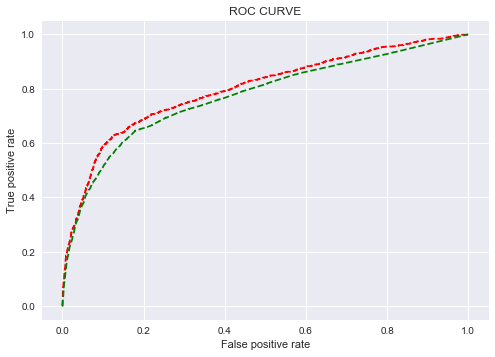

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.plot(fp12,tp12,linestyle='--',color='red',label="a")
plt.plot(fp11,tp11,linestyle='--',color='green',label='Forest')
plt.title("ROC CURVE")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [62]:
gmeans=sqrt(tp12*(1-fp12))
ix2=argmax(gmeans)
print("beat threshold forest",th12[ix2])

beat threshold forest 0.09677594693759252


In [63]:
probas2=y_pred_test_proba1[:,1]
val2=th12[ix2]
clas2=[]
for i in probas2:
    if i>val2:
        clas2.append(1)
    else:
        clas2.append(0)

In [64]:
mat1=confusion_matrix(y_test,clas2)
mat1

array([[8960, 1983],
       [ 458,  952]], dtype=int64)

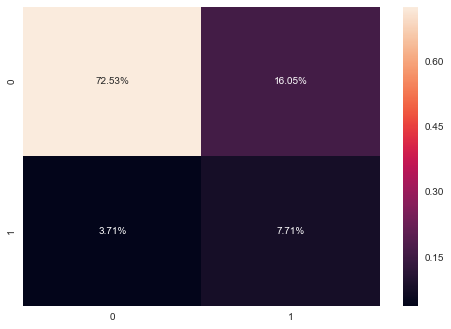

In [65]:
sns.heatmap(mat1/np.sum(mat1),annot=True,fmt='.2%')

=======you can also evaluate model with kfold========================================================

In [43]:
from sklearn.model_selection import cross_val_score
C_range=range(1,100)
C_acc=[]
for C1 in C_range:
    logreg11 = LogisticRegression(solver='lbfgs',C=C1)
    scores=cross_val_score(logreg11,X,Y,cv=10,scoring='roc_auc')
    C_acc.append(scores.mean())
print(C_acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[0.9221213457940747, 0.9182453981698672, 0.911098300547523, 0.9181693878672901, 0.9135722090211067, 0.914420094835279, 0.9159151264400673, 0.9134534545055744, 0.9179207752915415, 0.921620934869655, 0.9102839485211339, 0.9094321344925588, 0.9213767084770244, 0.9183596577737301, 0.9141226659069718, 0.9175776908433942, 0.9208346158064911, 0.9158133738123408, 0.916619576519536, 0.9073008466785393, 0.9214591962260487, 0.9143313295879618, 0.9201319129601014, 0.9206222308574968, 0.9057683117752973, 0.916225985665631, 0.9157023879588392, 0.9157418689261746, 0.919367343559404, 0.9219338722383709, 0.911506139777315, 0.9145223747237189, 0.9137224201947687, 0.9164909913890659, 0.9190508622060989, 0.9114007542451317, 0.9155218781617419, 0.9198997001489178, 0.9158215800678999, 0.9097778127908661, 0.9208459229722038, 0.9135568868271771, 0.9237792431622932, 0.916614565241734, 0.9167344120060067, 0.918532962496345, 0.9085594716922758, 0.9122116897591613, 0.9180232524422927, 0.9165385299885264, 0.916964

In [67]:
k=0
while(k<=len(C_acc)):
    if a == C_acc[k]:
        break
    else:
        i=i+1
    k=k+1
print("parameter with best performance",i+1)
i=0

parameter with best performance 43


Text(0, 0.5, 'logreg score')

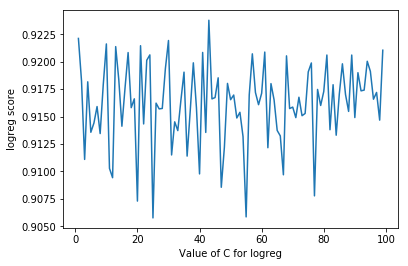

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(C_range,C_acc)
plt.xlabel("Value of C for logreg")
plt.ylabel("logreg score")